## Dataset Information
The training archive contains 25,000 images of dogs and cats. Train your algorithm on these files and predict the labels

(1 = dog, 0 = cat).

## Download Dataset

In [ ]:
# https://www.kaggle.com/datasets/karakaggle/kaggle-cat-vs-dog-dataset/data?select=kagglecatsanddogs_3367a

## Unzip the Dataset

In [ ]:
# !unzip kagglecatsanddogs_3367a.zip

## Import Modules

In [ ]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
import warnings
import PIL

warnings.filterwarnings('ignore')

# Membuat DataFrame dari gambar dan label

In [3]:
input_path = []
label = []

for class_name in os.listdir("PetImages"):
    for path in os.listdir(f"PetImages/{class_name}"):
        if class_name == 'Cat':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("PetImages", class_name, path))

df = pd.DataFrame({'images': input_path, 'label': label})
df = df.sample(frac=1).reset_index(drop=True)

# Menghapus file yang tidak valid

In [4]:
invalid_files = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        invalid_files.append(image)

df = df[~df['images'].isin(invalid_files)]
print(f"Jumlah data valid: {len(df)}")

Jumlah data valid: 24959


# Eksplorasi Data

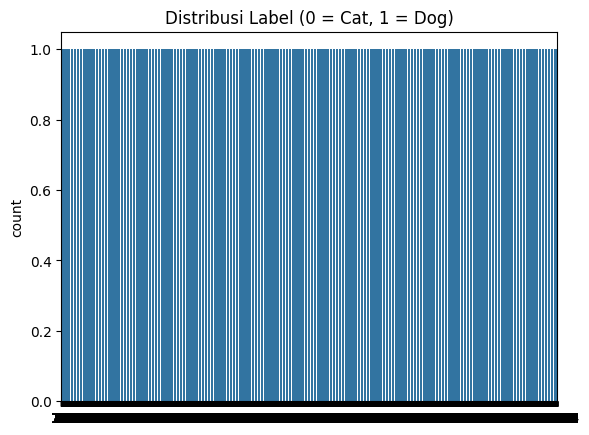

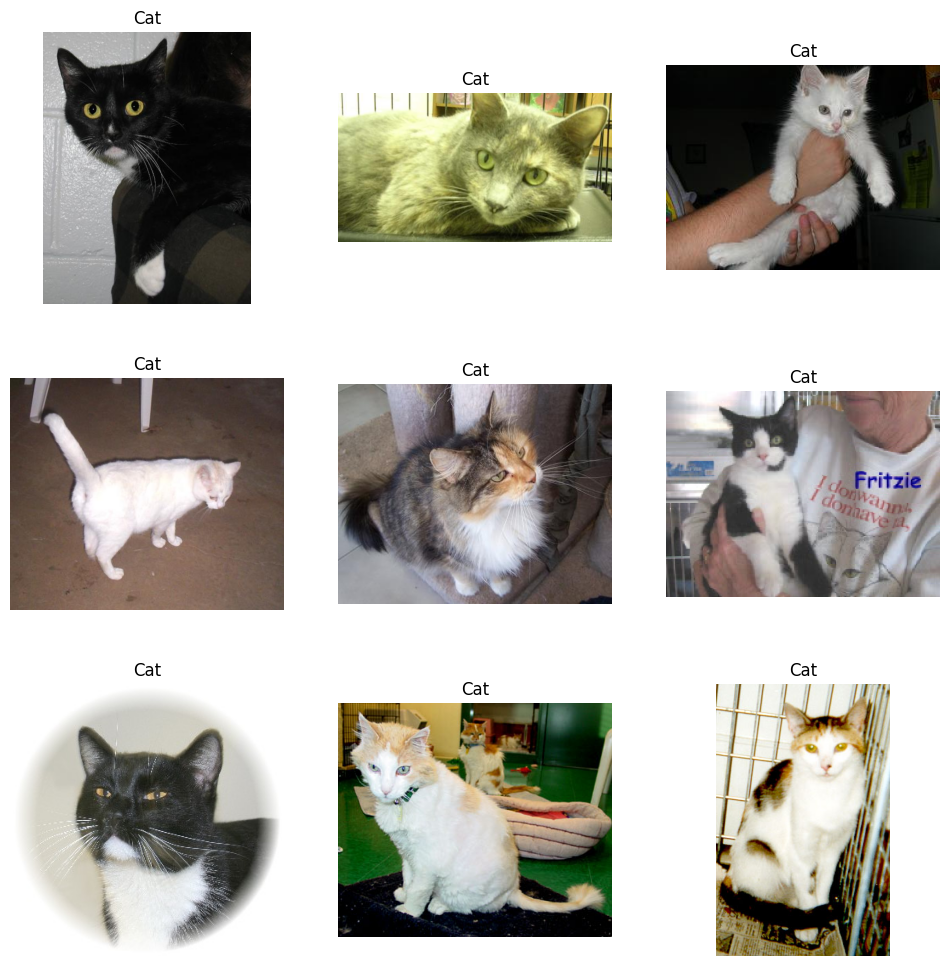

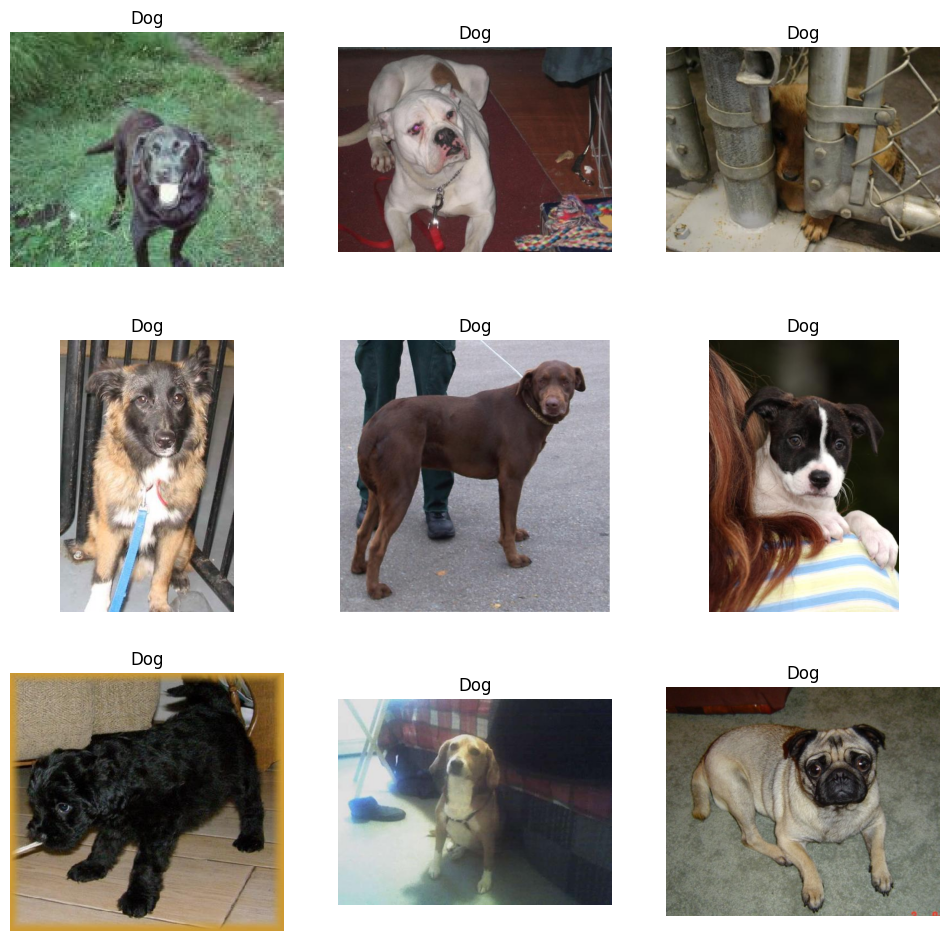

In [5]:
sns.countplot(df['label'])
plt.title("Distribusi Label (0 = Cat, 1 = Dog)")
plt.show()

# Menampilkan grid gambar kucing
plt.figure(figsize=(12, 12))
cat_images = df[df['label'] == 0]['images'][:9]
for i, img_path in enumerate(cat_images):
    plt.subplot(3, 3, i+1)
    img = load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Cat")
plt.show()

# Menampilkan grid gambar anjing
plt.figure(figsize=(12, 12))
dog_images = df[df['label'] == 1]['images'][:9]
for i, img_path in enumerate(dog_images):
    plt.subplot(3, 3, i+1)
    img = load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Dog")
plt.show()

# Preprocessing Data

In [7]:
# Mengubah label menjadi string 'cat' dan 'dog'
df['label'] = df['label'].map({0: 'cat', 1: 'dog'})

# Membagi data menjadi data latih dan uji
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Generator untuk augmentasi gambar
train_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_generator = ImageDataGenerator(rescale=1./255)

# Membuat iterator data
train_iterator = train_generator.flow_from_dataframe(
    train, x_col='images', y_col='label',
    target_size=(128, 128), batch_size=32, class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test, x_col='images', y_col='label',
    target_size=(128, 128), batch_size=32, class_mode='binary'
)

Found 19967 validated image filenames belonging to 2 classes.
Found 4992 validated image filenames belonging to 2 classes.


# Membangun Model CNN

In [8]:
# Membangun model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

# Melatih Model

In [9]:
# Melatih model
history = model.fit(
    train_iterator, epochs=10,
    validation_data=val_iterator
)

Epoch 1/10
624/624 [==============================] - 157s 250ms/step - loss: 0.6393 - accuracy: 0.6237 - val_loss: 0.5380 - val_accuracy: 0.7312
Epoch 2/10
624/624 [==============================] - 135s 217ms/step - loss: 0.5470 - accuracy: 0.7218 - val_loss: 0.5204 - val_accuracy: 0.7398
Epoch 3/10
624/624 [==============================] - 353s 566ms/step - loss: 0.4938 - accuracy: 0.7598 - val_loss: 0.4396 - val_accuracy: 0.7947
Epoch 4/10
624/624 [==============================] - 220s 352ms/step - loss: 0.4582 - accuracy: 0.7805 - val_loss: 0.3984 - val_accuracy: 0.8229
Epoch 5/10
624/624 [==============================] - 135s 216ms/step - loss: 0.4405 - accuracy: 0.7946 - val_loss: 0.3756 - val_accuracy: 0.8315
Epoch 6/10
624/624 [==============================] - 141s 225ms/step - loss: 0.4081 - accuracy: 0.8150 - val_loss: 0.3695 - val_accuracy: 0.8385
Epoch 7/10
624/624 [==============================] - 369s 591ms/step - loss: 0.3831 - accuracy: 0.8269 - val_loss: 0.3318 -

# Visualisasi Hasil Pelatihan

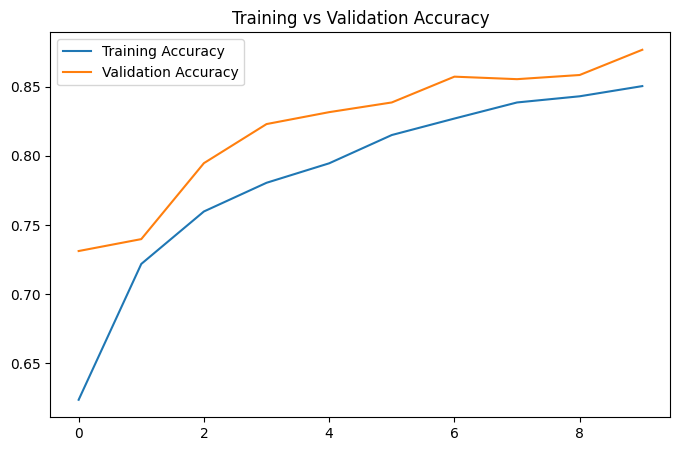

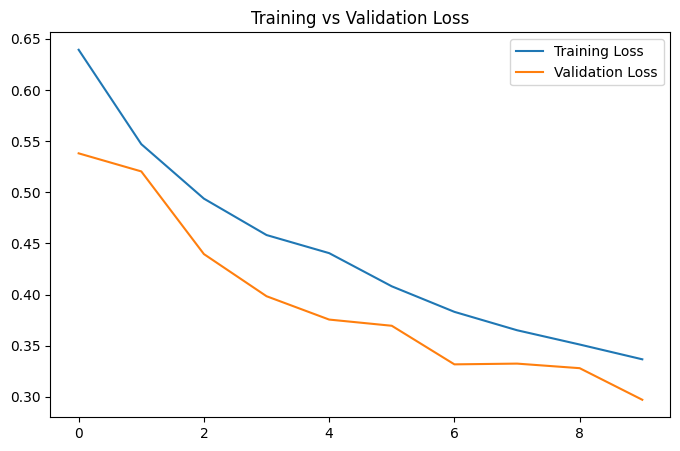

In [10]:
# Plot akurasi
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

# Pengujian Model dengan Gambar Baru

In [13]:
from keras.preprocessing.image import img_to_array

# Prediksi dengan gambar baru
image_path = "E:\\Belajar\\deeplearning\\Dogs vs Cats Image Classification - CNN\\harimau.jpg"  # Ubah dengan path gambar Anda
img = load_img(image_path, target_size=(128, 128))
img_array = img_to_array(img) / 255.0
img_array = img_array.reshape(1, 128, 128, 3)

prediction = model.predict(img_array)
label = "Dog" if prediction[0] > 0.5 else "Cat"
print(f"Gambar ini adalah: {label}")

1/1 [==============================] - 0s 23ms/step
Gambar ini adalah: Dog
